Environmental Protection Agency Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
airstatus = pd.read_csv('air_status.txt')
codes = pd.read_csv('codes.txt')
site = pd.read_csv('site.txt')
data = pd.read_csv('data_dictionary.txt')

In [3]:
airstatus.head(5)

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,WSO2,TOTAL_SO2,TOTAL_NO3,FLOW_VOLUME,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE
0,CON186,2003-06-17,2003-06-24,1.6460,2.6535,1.0740,0.1625,0.0440,0.1980,0.0609,...,0.3286,0.3544,6.0754,36.2704,168,NaN,1.196241,sa,3,2004-02-02
1,CON186,2003-06-24,2003-07-01,1.0356,0.6297,0.4035,0.2331,0.0394,0.1455,0.0444,...,0.4054,0.4466,4.0244,37.0314,167,NaN,1.227204,sa,3,2004-02-02
2,CON186,2003-07-01,2003-07-08,1.5335,1.2570,0.4836,0.2185,0.0759,0.3440,0.1697,...,0.5119,0.5684,5.7479,37.9842,171,NaN,1.228530,sa,3,2004-02-02
3,CON186,2003-07-08,2003-07-15,1.7773,0.8323,0.6537,0.2894,0.0541,0.2134,0.0850,...,0.4154,0.4510,5.0664,37.3987,166,NaN,1.245875,sa,3,2004-02-02
4,CON186,2003-07-15,2003-07-22,2.1637,1.3187,0.7899,0.4331,0.0800,0.2679,0.1382,...,0.6910,0.7512,5.5863,37.1449,166,NaN,1.237604,sa,3,2004-02-02


In [4]:
airstatus.columns

Index(['SITE_ID', 'DATEON', 'DATEOFF', 'TSO4', 'TNO3', 'TNH4', 'Ca', 'Mg',
       'Na', 'K', 'Cl', 'NSO4', 'NHNO3', 'WSO2', 'TOTAL_SO2', 'TOTAL_NO3',
       'FLOW_VOLUME', 'VALID_HOURS', 'COMMENT_CODES', 'STD2LOCAL_CF',
       'TEMP_SOURCE', 'QA_CODE', 'UPDATE_DATE'],
      dtype='object')

In [5]:
airstatus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 23 columns):
SITE_ID          6159 non-null object
DATEON           6159 non-null object
DATEOFF          6159 non-null object
TSO4             6159 non-null float64
TNO3             6159 non-null float64
TNH4             6159 non-null float64
Ca               4936 non-null float64
Mg               4936 non-null float64
Na               4936 non-null float64
K                4932 non-null float64
Cl               3862 non-null float64
NSO4             6159 non-null float64
NHNO3            6159 non-null float64
WSO2             6159 non-null float64
TOTAL_SO2        6159 non-null float64
TOTAL_NO3        6159 non-null float64
FLOW_VOLUME      6159 non-null float64
VALID_HOURS      6159 non-null int64
COMMENT_CODES    1317 non-null object
STD2LOCAL_CF     6159 non-null float64
TEMP_SOURCE      6159 non-null object
QA_CODE          6159 non-null int64
UPDATE_DATE      6159 non-null object
dtypes

In [6]:
data

,COLUMN_NAME,UNIT,DATA_TYPE,DESCRIPTION
0,SITE_ID,NaN,CHAR,Site identification code. See the file site.cs...
1,DATEON,NaN,DATE,"Date the sample collection began, Local Standa..."
2,DATEOFF,NaN,DATE,"Date the sample collection ended, Local Standa..."
3,TSO4,ug/m^3,NUMBER,Sulfate (SO4) concentration from Teflon filter...
4,TNO3,ug/m^3,NUMBER,Nitrate (NO3) concentration from Teflon filter...
5,TNH4,ug/m^3,NUMBER,Ammonium (NH4) concentration from Teflon filte...
6,Ca,ug/m^3,NUMBER,Calcium (Ca) concentration from Teflon filter;...
7,Mg,ug/m^3,NUMBER,Magnesium (Mg) concentration from Teflon filte...
8,Na,ug/m^3,NUMBER,Sodium (Na) concentration from Teflon filter; ...
9,K,ug/m^3,NUMBER,Potassium (K) concentration from Teflon filter...


In [7]:
site

,SITE_ID,location
0,PIN414,Pinnacles NM
1,SEK430,Sequoia NP - Ash Mountain
2,DEV412,Death Valley NM
3,SEK402,Sequoia NP - Lookout Pt
4,JOT403,Joshua Tree NP
5,YOS404,Yosemite NP - Turtleback Dome
6,CON186,Converse Station
7,LAV410,Lassen Volcanic NP


In [8]:
joshua_park = airstatus[airstatus['SITE_ID'] == 'CON186']

Finding Correlation between Pollutants

In [11]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['TOTAL_NO3'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['TOTAL_NO3'].mean()
        std = df.groupby(col)['TOTAL_NO3'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'TOTAL_NO3', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Total Nitrate (NO3)')
    plt.show()

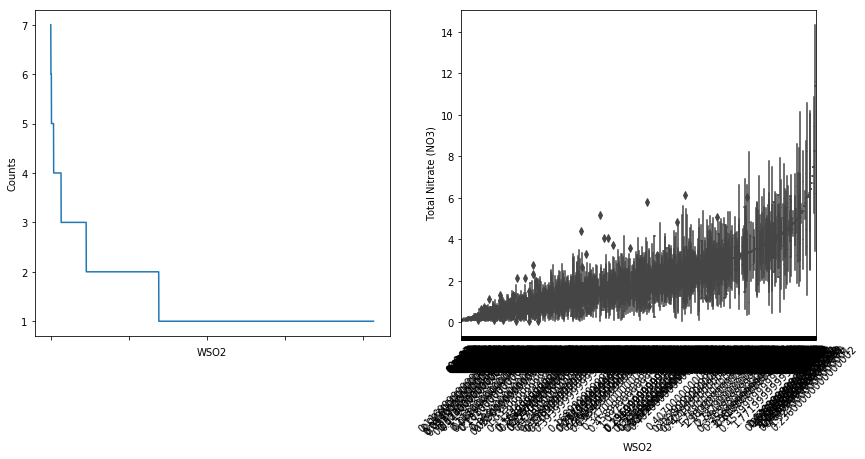

In [14]:
plot_feature(airstatus, 'WSO2')

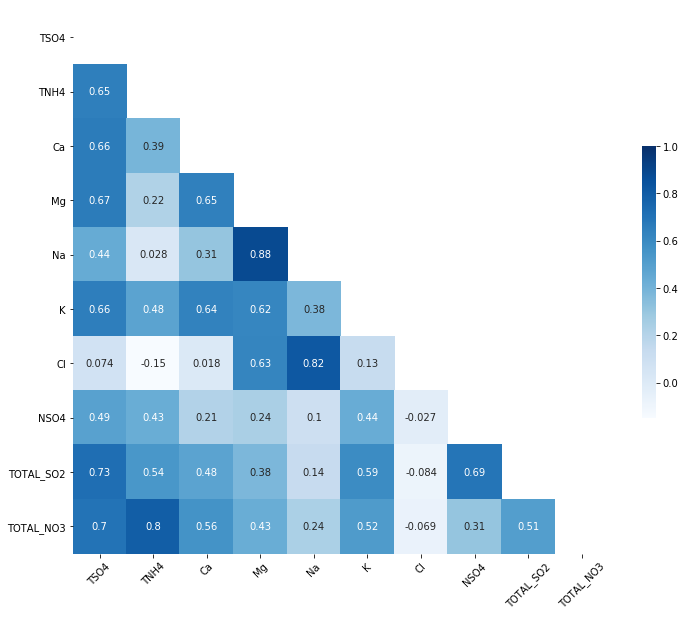

In [25]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
mask = np.triu(airstatus[features + ['TOTAL_NO3']].corr())


fig = plt.figure(figsize=(12, 10))
features = ['TSO4', 'TNH4', 'Ca', 'Mg','Na', 'K', 'Cl', 'NSO4', 'WSO2', 'TOTAL_SO2']
sns.heatmap(airstatus[features + ['TOTAL_NO3']].corr(), cmap='Blues', annot=True, mask=mask, cbar_kws={"shrink": .50})
plt.xticks(rotation=45)
plt.show()

In [ ]:
##Model 1 R Code

In [ ]:
#read in data
NO3.data <- read.table("air_status.csv", header=T, sep=",")

Library(rcompanion)

#check data distribution on N03
plotNormalHistogram(NO3.data$TOTAL_NO3)

#use gamma model Total n03
fitted.model <- lm(TOTAL_NO3 ~ TNH4 + TSO4 + Ca + K + WSO2, data = NO3.data, family = Gamma(link=log))
summary(fitted.model)

lm.coeff <- coef(fitted.model)

plot(fitted.model)

#import test data
test.data <- read.table("test.csv", header=T, sep=",")

test.data.final <- cbind(a = 1, test.data[,c("TNH4", "TSO4", "Ca", "K", "WSO2")])

#multiply variables of interest with their coeff & sum for the TotalNO3 value
prediction <- rowSums(lm.coeff * test.data.final)

pred.data <- cbind(test.data, prediction)